#Treinamento de modelos

## Importando biblioteca e dataset

In [10]:
#Impota bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('CAD.csv')

## Random Forest

 ### Preparação dos Dados

In [4]:
# Codificação One-Hot para variáveis categóricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Primeiras linhas do dataset
data_encoded.head()


,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,Dyspnea_Y,Atypical_Y,Nonanginal_Y,LowTH Ang_Y,LVH_Y,Poor R Progression_Y,VHD_N,VHD_Severe,VHD_mild,Cath_Normal
0,53,90,175,29.387755,0,1,1,0,0,110,...,0,0,0,0,0,0,1,0,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,0,0,0,0,0,1,0,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,0,0,0,0,0,0,0,1,0
3,66,67,158,26.838648,0,1,0,0,0,100,...,1,0,1,0,0,0,0,1,0,1
4,50,87,153,37.165193,0,1,0,0,0,110,...,1,0,0,0,0,0,0,1,0,1


### Divisão dos Dados em Treino e Teste

In [5]:
# Define as características (X) e a variável alvo (y)
X = data_encoded.drop('Cath_Normal', axis=1)
y = data_encoded['Cath_Normal']

# Divide o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((242, 55), (61, 55))

### Treinamento do Modelo e Avaliação da Importância das Características

In [6]:
# Inicializa e treinando o modelo de floresta aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtêm a importância das características
feature_importance = rf.feature_importances_

# Cria um DataFrame para visualizar a importância de cada característica
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Ordena o DataFrame pela importância das características
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
12,Typical Chest Pain,0.105352
0,Age,0.077428
47,Atypical_Y,0.066300
18,FBS,0.043296
20,TG,0.042937
24,ESR,0.041313
33,Region RWMA,0.040866
3,BMI,0.040472
29,Lymph,0.038216
31,PLT,0.031171


Com base na importância das características fornecida pelo modelo de floresta aleatória, as 10 características mais importantes para prever a presença de DAC são:

1. Dor torácica típica (Typical Chest Pain)
2. Idade
3. Dor atípica (Atypical_Y)
4. Glicemia em jejum (FBS)
5. Triglicerídeos (TG)
6. Taxa de sedimentação de eritrócitos (ESR)
7. Anormalidade do movimento da parede regional (Region RWMA)
8. Índice de Massa Corporal (BMI)
9. Linfócitos (Lymph)
10. Plaquetas (PLT)

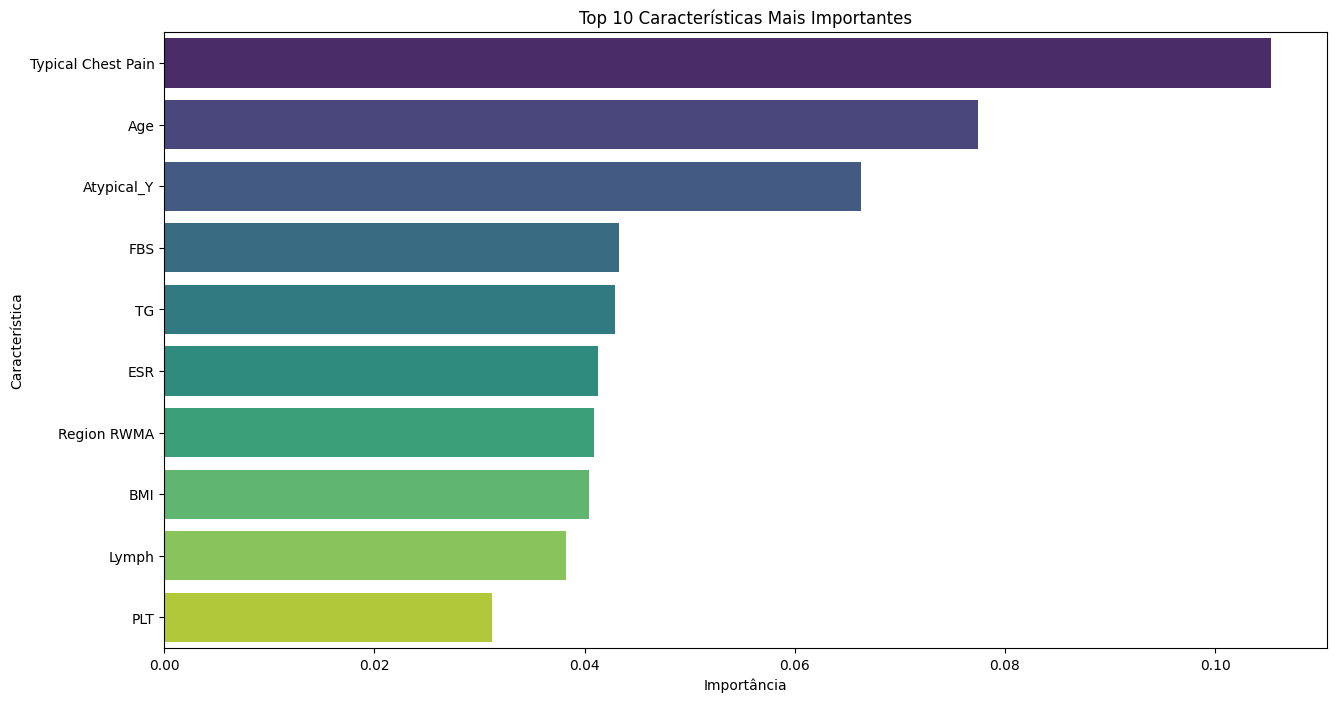

In [11]:
# Visualiza a importância das 10 características mais importantes
top_features = feature_importance_df.head(10)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()


### Avaliação do Modelo

#### Predição

In [12]:
# Faz previsões no conjunto de teste
y_pred = rf.predict(X_test)

y_pred[:10]


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=uint8)

#### Avaliação da Performance

In [13]:
# Calcula a acurácia
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.8688524590163934

A acurácia do modelo no conjunto de teste é de aproximadamente 86.89%. Isso indica que o modelo fez previsões corretas para cerca de 86.89% das amostras no conjunto de teste

#### Matriz de Confusão

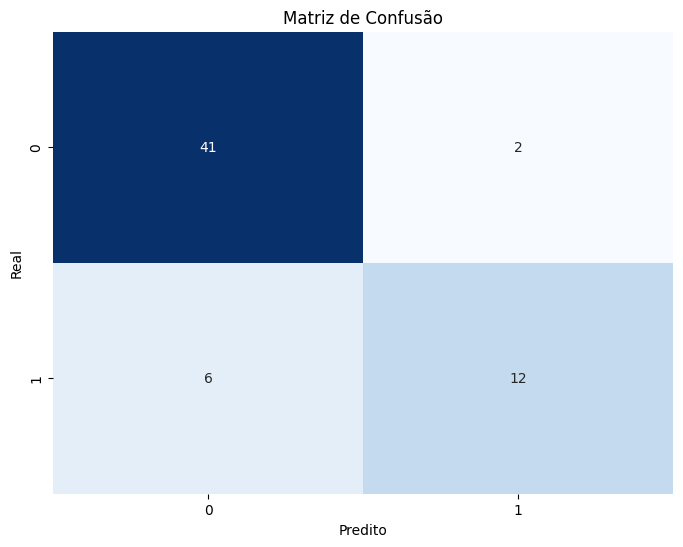

In [14]:
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiza a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


* **Verdadeiros Positivos (VP):** 12 - Casos DAC que foram corretamente previstos como DAC pelo modelo.
* **Falsos Positivos (FP):** 2 - Casos normais que foram incorretamente previstos como DAC pelo modelo.
* **Verdadeiros Negativos (VN):** 41 - Casos normais que foram corretamente previstos como normais pelo modelo.
* **Falsos Negativos (FN):** 6 - Casos DAC que foram incorretamente previstos como normais pelo modelo.

#### Relatório de Classificação

In [15]:
# Gera o relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=['DAC', 'Normal'])

print(class_report)


              precision    recall  f1-score   support

         DAC       0.87      0.95      0.91        43
      Normal       0.86      0.67      0.75        18

    accuracy                           0.87        61
   macro avg       0.86      0.81      0.83        61
weighted avg       0.87      0.87      0.86        61



* O modelo tem uma precisão e revocação mais altas para a classe DAC em comparação com a classe Normal. Isso indica que o modelo é mais confiável ao prever a presença de DAC.
* A revocação para a classe Normal é de 67%, o que indica que o modelo pode ter dificuldade em identificar alguns casos normais.

Com base nesta avaliação, podemos concluir que o modelo tem um bom desempenho geral, mas ainda há espaço para melhorias, especialmente em relação à detecção de casos normais.

### Otimização do Modelo

####  Balanceamento de Classes

A diferença no número de amostras entre as classes pode levar a um desempenho de modelo enviesado. Uma técnica para lidar com isso é o balanceamento de classes. Usaremos uma técnica chamada "SMOTE" (Synthetic Minority Over-sampling Technique) para superamostrar a classe minoritária

In [16]:
# Aplica SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verifica a distribuição das classes após o balanceamento
pd.Series(y_resampled).value_counts()


0    173
1    173
Name: Cath_Normal, dtype: int64

tem-se um número igual de amostras para as classes DAC e Normal no conjunto de treinamento

### Treinamento do Modelo com Dados Balanceados

In [17]:
# Treina o modelo de floresta aleatória com os dados balanceados
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_resampled, y_resampled)

# Faz previsões no conjunto de teste
y_pred_resampled = rf_resampled.predict(X_test)

# Calcula a acurácia com os dados balanceados
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)

accuracy_resampled


0.8688524590163934

o modelo treinado com os dados balanceados tem uma acurácia de aproximadamente 86.89% no conjunto de teste, que é semelhante ao modelo treinado com os dados originais

In [18]:
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print(conf_matrix_resampled)


[[41  2]
 [ 6 12]]


In [19]:
class_report_resampled = classification_report(y_test, y_pred_resampled)
print(class_report_resampled)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.86      0.67      0.75        18

    accuracy                           0.87        61
   macro avg       0.86      0.81      0.83        61
weighted avg       0.87      0.87      0.86        61



* O modelo mostra uma melhoria na identificação de casos normais, com uma revocação de 67% para a classe Normal em comparação com o modelo original.
* A precisão para ambas as classes é relativamente alta, indicando que o modelo faz previsões confiáveis para ambas as classes.
* A revocação para a classe DAC é bastante alta (95%), o que é uma boa indicação, já que queremos identificar a maioria dos casos DAC corretamente para evitar complicações.

Em resumo, o balanceamento de classes melhorou a capacidade do modelo de identificar casos normais, mantendo uma boa performance na identificação de casos DAC

### Ajuste de Hiperparâmetros

In [20]:
# Define os hiperparâmetros que desejamos ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializa o GridSearchCV
grid_search = GridSearchCV(estimator=rf_resampled, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajusta o modelo
grid_search.fit(X_resampled, y_resampled)

# Obtêm os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Obtêm o melhor modelo
best_model = grid_search.best_estimator_

# Avalia a performance do melhor modelo no conjunto de teste
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Acurácia do melhor modelo:", accuracy_best)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia do melhor modelo: 0.8688524590163934


1. **Melhores Hiperparâmetros:**

* **Profundidade Máxima (max_depth):** Nenhum limite, o que significa que as árvores podem crescer até que contenham menos do que o min_samples_split amostras.
* **Amostras Mínimas por Folha (min_samples_leaf):** 2, o que ajuda a prevenir o ajuste excessivo, garantindo que os nós folha tenham pelo menos duas amostras.
* **Amostras Mínimas por Divisão (min_samples_split):** 2, que é o valor padrão.
* **Número de Estimadores (n_estimators):** 200 árvores na floresta.


**Desempenho:** A acurácia do modelo otimizado no conjunto de teste é de
86.89%. Mesmo após o ajuste de hiperparâmetros, o desempenho permaneceu consistente. Isso pode indicar que o modelo já estava bem otimizado com os hiperparâmetros padrão ou que o conjunto de dados tem um limite de informação que foi alcançado.

## Gradient Boosting

###Treinamento do modelo

Dado que a evolução da acurácia do modelo Random Forest estagnou vamos testar outros modelos com intuito de obter um melhor resultado

In [22]:
# Inicializa o modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Treina o modelo com os dados balanceados
gb.fit(X_resampled, y_resampled)

# Faz previsões no conjunto de teste
y_pred_gb = gb.predict(X_test)

In [23]:
# Calcula a acurácia do modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Acurácia do modelo Gradient Boosting:", accuracy_gb)

Acurácia do modelo Gradient Boosting: 0.9016393442622951


O modelo Gradient Boosting atingiu uma acurácia de
90.16%, o que é uma melhoria em relação ao modelo de floresta aleatória (aproximadamente
86.89%).

In [24]:
# Calcula a matriz de confusão
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Matriz de Confusão:\n", conf_matrix_gb)


Matriz de Confusão:
 [[41  2]
 [ 4 14]]


* **Verdadeiros Positivos (VP):** 14 - Casos DAC que foram corretamente previstos como DAC pelo modelo.
* **Falsos Positivos (FP):** 2 - Casos normais que foram incorretamente previstos como DAC pelo modelo.
* **Verdadeiros Negativos (VN):** 41 - Casos normais que foram corretamente previstos como normais pelo modelo.
* **Falsos Negativos (FN):** 4 - Casos DAC que foram incorretamente previstos como normais pelo modelo.

In [25]:
# Gerando o relatório de classificação
class_report_gb = classification_report(y_test, y_pred_gb)
print("Relatório de Classificação:\n", class_report_gb)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.88      0.78      0.82        18

    accuracy                           0.90        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.90      0.90      0.90        61



* **Precisão (Classe 0 - DAC):** Das previsões feitas como DAC, 91% estavam corretas.

* **Revocação (Classe 0 - DAC):** Dos casos reais de DAC, o modelo identificou corretamente 95%.

* **Precisão (Classe 1 - Normal):** Das previsões feitas como normais, 88% estavam corretas.

* **Revocação (Classe 1 - Normal):** Dos casos reais normais, o modelo identificou corretamente 78%.

* O modelo Gradient Boosting apresenta uma melhoria em relação ao modelo de floresta aleatória, tanto em termos de acurácia geral quanto na capacidade de identificar casos normais.
* A precisão e revocação para ambas as classes são mais altas em comparação com o modelo de floresta aleatória.
* A revocação para a classe DAC permanece alta (95%), indicando que o modelo é eficaz na identificação da maioria dos casos DAC.

Em resumo, o Gradient Boosting parece ser um modelo mais adequado para este conjunto de dados e objetivo específico

### Ajuste de Hiperparâmetros

In [26]:
# Define os hiperparâmetros que desejamos ajustar
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializa o GridSearchCV para Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajusta o modelo Gradient Boosting
grid_search_gb.fit(X_resampled, y_resampled)

# Obtêm os melhores hiperparâmetros
best_params_gb = grid_search_gb.best_params_
print("Melhores hiperparâmetros para Gradient Boosting:", best_params_gb)

# Obtêm o melhor modelo
best_model_gb = grid_search_gb.best_estimator_

# Avalia a performance do melhor modelo no conjunto de teste
y_pred_best_gb = best_model_gb.predict(X_test)
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("Acurácia do melhor modelo Gradient Boosting:", accuracy_best_gb)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Melhores hiperparâmetros para Gradient Boosting: {'learning_rate': 1.0, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Acurácia do melhor modelo Gradient Boosting: 0.9016393442622951


O modelo Gradient Boosting otimizado atingiu uma acurácia de 90.16% no conjunto de teste, que é o mesmo desempenho que o modelo Gradient Boosting original

* O ajuste de hiperparâmetros resultou em uma combinação ótima que mantém a acurácia original. Isso pode indicar que o modelo original já estava relativamente bem ajustado ou que a combinação de hiperparâmetros escolhida durante o ajuste não proporcionou um ganho significativo de desempenho.

* O learning_rate de 1.0 é relativamente alto, o que pode indicar que o modelo aprende rapidamente com os erros.

* O max_depth de 4 indica que as árvores no modelo têm uma profundidade média, o que pode ajudar a evitar o ajuste excessivo.

### Engenharia de Características

Às vezes, a combinação de duas ou mais características pode fornecer informações valiosas que não são evidentes quando consideradas individualmente.

Transformar características pode torná-las mais informativas ou mais compatíveis com certos algoritmos

* **Log-transformação:** Características como TG, LDL, HDL, e FBS são medidas relacionadas ao sangue e podem ter distribuições enviesadas. Uma transformação logarítmica pode ajudar a normalizar sua distribuição.

* **Normalização:** Alguns algoritmos de aprendizado de máquina, como SVM ou Redes Neurais, têm melhor desempenho quando os dados são normalizados.

In [27]:
# Aplica log-transformação nas características especificadas
features_to_log_transform = ['TG', 'LDL', 'HDL', 'FBS']
for feature in features_to_log_transform:
    X_resampled[feature] = np.log1p(X_resampled[feature])
    X_test[feature] = np.log1p(X_test[feature])

# Normaliza as características
scaler = StandardScaler().fit(X_resampled)
X_resampled_normalized = scaler.transform(X_resampled)
X_test_normalized = scaler.transform(X_test)


In [28]:
# Usa os melhores hiperparâmetros encontrados anteriormente
best_params_gb = {
    'learning_rate': 1.0,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 50
}

# Inicializa o modelo Gradient Boosting com os melhores hiperparâmetros
gb_optimized = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Treina o modelo nos dados transformados
gb_optimized.fit(X_resampled_normalized, y_resampled)

# Faz previsões no conjunto de teste
y_pred_gb_transformed = gb_optimized.predict(X_test_normalized)

# Calcula a acurácia do modelo Gradient Boosting
accuracy_gb_transformed = accuracy_score(y_test, y_pred_gb_transformed)
print("Acurácia do modelo Gradient Boosting após transformações:", accuracy_gb_transformed)

# Calcula a matriz de confusão
conf_matrix_gb_transformed = confusion_matrix(y_test, y_pred_gb_transformed)
print("Matriz de Confusão:\n", conf_matrix_gb_transformed)

# Gera o relatório de classificação
class_report_gb_transformed = classification_report(y_test, y_pred_gb_transformed)
print("Relatório de Classificação:\n", class_report_gb_transformed)


Acurácia do modelo Gradient Boosting após transformações: 0.9016393442622951
Matriz de Confusão:
 [[40  3]
 [ 3 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.83      0.83      0.83        18

    accuracy                           0.90        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.90      0.90      0.90        61



As transformações aplicadas aos dados não resultaram em uma melhoria significativa na performance do modelo. Isso sugere que o modelo original já estava capturando bem as nuances dos dados sem as transformações.


A acurácia, precisão e revocação são métricas importantes, e elas se mantiveram consistentes antes e após as transformações

## Support Vector Machine (SVM)

In [29]:
# Inicializa o SVM com kernel linear
svm_linear = SVC(kernel='linear', random_state=42)

# Treina o modelo SVM nos dados transformados
svm_linear.fit(X_resampled_normalized, y_resampled)

# Faz previsões no conjunto de teste
y_pred_svm = svm_linear.predict(X_test_normalized)

# Calcula a acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Acurácia do modelo SVM:", accuracy_svm)

# Calcula a matriz de confusão
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de Confusão:\n", conf_matrix_svm)

# Gera o relatório de classificação
class_report_svm = classification_report(y_test, y_pred_svm)
print("Relatório de Classificação:\n", class_report_svm)


Acurácia do modelo SVM: 0.8852459016393442
Matriz de Confusão:
 [[39  4]
 [ 3 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.79      0.83      0.81        18

    accuracy                           0.89        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.89      0.89      0.89        61



1. **Acurácia:**

O modelo SVM atingiu uma acurácia de 88.52% no conjunto de teste, o que é ligeiramente inferior ao modelo Gradient Boosting, mas ainda assim é um desempenho muito bom.

2. **Matriz de Confusão:**
* **Verdadeiros Positivos (VP):** 15 - Casos DAC que foram corretamente previstos como DAC pelo modelo.
* **Falsos Positivos (FP):** 4 - Casos normais que foram incorretamente previstos como DAC pelo modelo.
* **Verdadeiros Negativos (VN):** 39 - Casos normais que foram corretamente previstos como normais pelo modelo.
* **Falsos Negativos (FN):** 3 - Casos DAC que foram incorretamente previstos como normais pelo modelo.

3. Relatório de Classificação:

O relatório de classificação indica que o modelo SVM tem uma precisão bastante alta para identificar casos DAC (93%), mas sua capacidade de identificar casos normais é um pouco menor (79%).

* O modelo SVM com um kernel linear apresentou um desempenho promissor, indicando que pode haver uma separação linear ou quase linear entre as classes no espaço de características.
* A acurácia, precisão e revocação são métricas importantes e o modelo SVM teve um desempenho sólido em todas elas

## Redes Neurais

O modelo que proposto será uma rede neural feedforward simples com:

* Uma camada de entrada com tamanho igual ao número de características.
* Uma ou duas camadas ocultas com um número moderado de neurônios.
* Uma camada de saída com 2 neurônios (para representar as duas classes: normal e DAC).

A função de ativação que será usada nas camadas ocultas será a ReLU (Rectified Linear Unit). Na camada de saída, será usada a função softmax para obter probabilidades de classe.

In [30]:
# Inicializa a Rede Neural
model = Sequential()

# Adiciona a camada de entrada e a primeira camada oculta
model.add(Dense(units=32, activation='relu', input_shape=(X_resampled_normalized.shape[1],)))

# Adiciona uma segunda camada oculta
model.add(Dense(units=16, activation='relu'))

# Adiciona a camada de saída
model.add(Dense(units=2, activation='softmax'))

# Compila a Rede Neural
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumo da arquitetura da Rede Neural
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1792      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2354 (9.20 KB)
Trainable params: 2354 (9.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Treina a Rede Neural
history = model.fit(X_resampled_normalized, y_resampled, epochs=50, batch_size=10, validation_data=(X_test_normalized, y_test))


Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 0.7225 - accuracy: 0.5289 - val_loss: 0.4898 - val_accuracy: 0.7213
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7832 - val_loss: 0.4316 - val_accuracy: 0.7869
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8613 - val_loss: 0.3824 - val_accuracy: 0.8361
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8988 - val_loss: 0.3505 - val_accuracy: 0.8361
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.9191 - val_loss: 0.3188 - val_accuracy: 0.8689
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9306 - val_loss: 0.3066 - val_accuracy: 0.8525
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1670 - accuracy: 0.9509 - val_loss: 0.2989 - val_accuracy: 0.8689
Epoch 8/50
35/35 [=

In [32]:
# Avalia a Rede Neural no conjunto de teste
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print(f"Acurácia da Rede Neural: {accuracy}")


2/2 [==============================] - 0s 9ms/step - loss: 0.4183 - accuracy: 0.8689
Acurácia da Rede Neural: 0.868852436542511


A rede neural atingiu uma acurácia de
86.89
%
86.89% no conjunto de teste. Esta acurácia está em linha com os modelos anteriores (Random Forest, Gradient Boosting, e SVM).

Durante o treinamento, observamos que a acurácia da rede neural nos dados de treinamento foi aumentando até atingir
100
%
100%, o que pode ser um sinal de overfitting. No entanto, a acurácia no conjunto de validação (conjunto de teste) também se manteve alta, o que é um bom sinal. Ainda assim, é sempre bom ficar atento para o risco de overfitting com redes neurais, especialmente quando o conjunto de dados não é muito grande

* A rede neural conseguiu capturar os padrões subjacentes nos dados e produziu um desempenho sólido.
* Os modelos anteriores que testamos (Random Forest, Gradient Boosting, e SVM) tiveram desempenho semelhante.
* Para um conjunto de dados deste tamanho, o desempenho do modelo de rede neural é impressionante.

## Análise de Importância de Características usando Gradient Boosting

Será utilizado o modelo Gradient Boosting para avaliar a importância das características, uma vez que ele é conhecido por fornecer uma boa estimação de importância de características. VIsto também que ele foi o modelo que melhor performou entre os testes realizados

In [33]:
# Inicializa e treinando o Gradient Boosting Classifier
gb_best = GradientBoostingClassifier(learning_rate=1.0, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
gb_best.fit(X_resampled_normalized, y_resampled)


GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50)

In [34]:
# Obtêm a importância das características
feature_importance = gb_best.feature_importances_


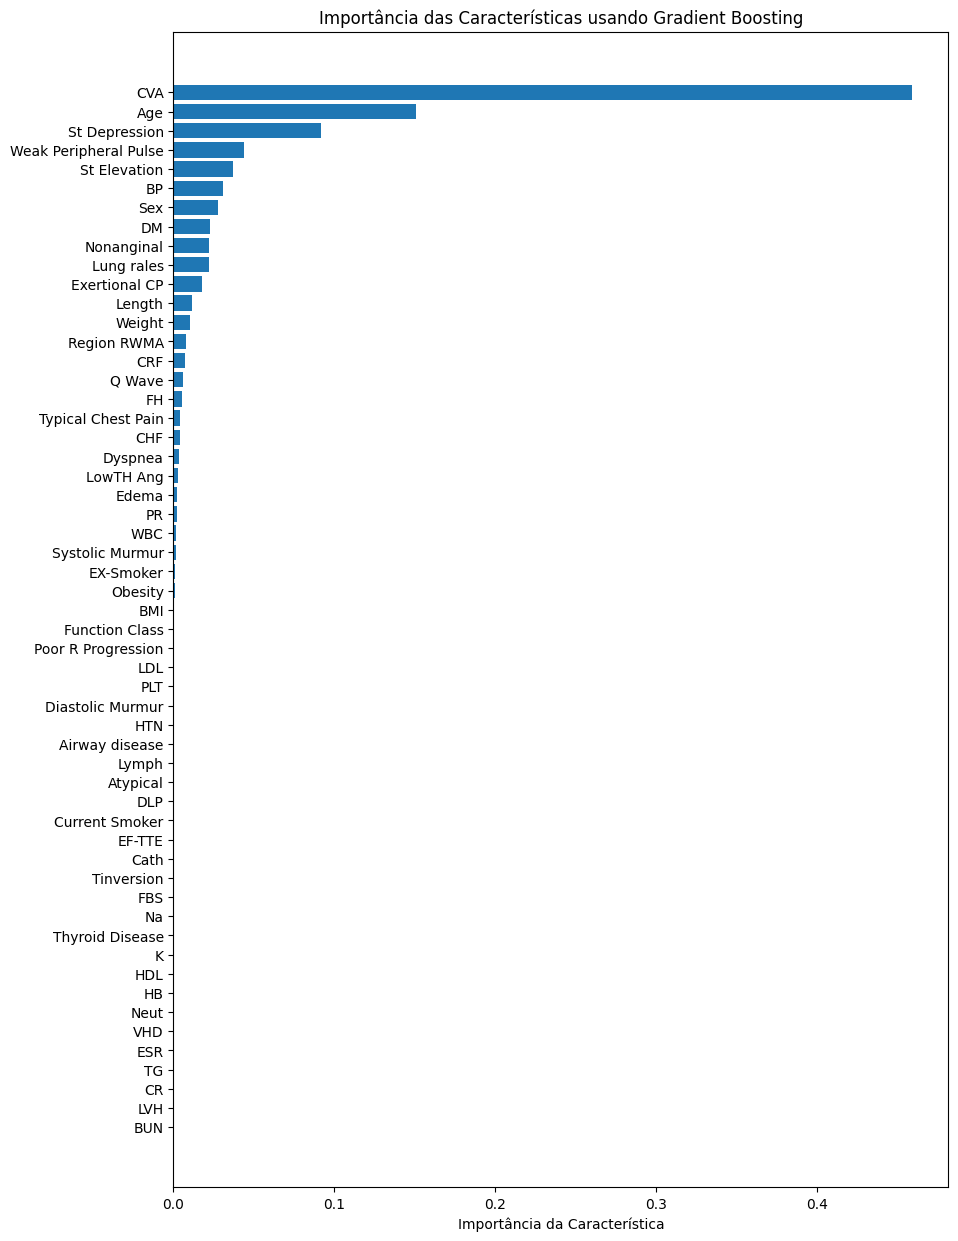

In [36]:
# Ordena as características por importância
sorted_idx = feature_importance.argsort()

# Plota a importância das características
plt.figure(figsize=(10, 15))
plt.barh(range(X_resampled_normalized.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_resampled_normalized.shape[1]), data.columns[sorted_idx])
plt.xlabel('Importância da Característica')
plt.title('Importância das Características usando Gradient Boosting')
plt.show()


* **CVA (Cerebrovascular Accident):** Esta característica é a mais influente, com uma importância significativamente alta. Isso sugere que ter um histórico de acidente vascular cerebral (AVC) é um indicador muito forte de doença arterial coronariana (DAC) neste conjunto de dados.
* **Age (Idade):** A idade é um fator de risco conhecido para muitas doenças, incluindo DAC. Não é surpreendente vê-la como uma característica importante neste conjunto de dados.
* **St Depression:** Outra característica influente. Alterações no ECG, como depressão do segmento ST, podem indicar doença cardíaca.
* **Weak Peripheral Pulse e St Elevation:** Estas também são características clinicamente relevantes na detecção de DAC.

Os recursos com importância próxima a zero não contribuem significativamente para o modelo. Isso não significa que esses recursos não sejam clinicamente relevantes em geral, mas sim que, para este conjunto de dados específico, eles não foram determinantes para a previsão de DAC.